In [1]:
#初识pytorch
import torch
import time
import numpy as np

In [2]:
a = torch.randn(100000,1000)
b = torch.randn(1000,200)
t1 = time.time()
c = torch.matmul(a,b)
t2 = time.time()
print(a.device, t2 - t1,c.norm(2))

cpu 0.5167407989501953 tensor(1.00000e+05 *
       1.4151)


In [3]:
torch.tensor([2,3])

tensor([ 2,  3])

In [4]:
#numpy
q = np.array([2.3,3,3])
p = np.ones([2,3])
torch.from_numpy(p)
torch.from_numpy(q)

tensor([ 2.3000,  3.0000,  3.0000], dtype=torch.float64)

In [5]:
#list tensor只有一个参数
torch.tensor([1,2])
torch.tensor([[1,2,3],[2,3,4]])

tensor([[ 1,  2,  3],
        [ 2,  3,  4]])

In [6]:
#uninitialized
torch.empty(2)
torch.Tensor([1,2])#Tensor有多个参数时表示size
torch.IntTensor(2,3,4)

tensor([[[ 0.0000e+00, -2.6844e+08,  0.0000e+00, -2.6844e+08],
         [ 2.0667e+09,  3.2707e+04,  2.0668e+09,  3.2707e+04],
         [ 2.0668e+09,  3.2707e+04,  0.0000e+00,  3.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  2.0279e+09,  3.2707e+04],
         [ 0.0000e+00, -2.6844e+08,  0.0000e+00, -2.6844e+08],
         [ 3.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]], dtype=torch.int32)

In [7]:
#rand
a = torch.rand(2,3)
torch.rand_like(a)
torch.randint(1,10,[3,3])

tensor([[ 6.,  9.,  3.],
        [ 2.,  7.,  5.],
        [ 6.,  9.,  7.]])

In [8]:
#randn normal
torch.randn(2,3)
torch.normal(torch.full([10],0),torch.arange(1,0,-0.1))

tensor([ 1.5418, -0.7873, -0.3838, -0.8312, -0.8709, -1.1153, -0.5277,
        -0.2725,  0.0039,  0.0492])

In [9]:
#full
torch.full([10],7)
torch.full([2,3],7)

tensor([[ 7.,  7.,  7.],
        [ 7.,  7.,  7.]])

In [10]:
#arange range包含end arange不包含end
torch.arange(1,10)
torch.arange(1,10,2)

tensor([ 1.,  3.,  5.,  7.,  9.])

In [11]:
torch.range(0,10)

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
         10.])

In [12]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [13]:
#linspace logspace
torch.linspace(0,10,steps=4)
#tensor([  0.0000,   3.3333,   6.6667,  10.0000])
torch.logspace(0,10,steps=4)#10的多少次方

tensor([ 1.0000e+00,  2.1544e+03,  4.6416e+06,  1.0000e+10])

In [14]:
#ones zeros
torch.ones([3,3])
torch.zeros([3,3])
torch.eye(3,4)

tensor([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]])

In [15]:
#randperm
torch.randperm(10)#range之后再shuffle

tensor([ 3,  5,  1,  6,  8,  9,  4,  7,  0,  2])

In [65]:
#索引和切片
a = torch.Tensor(4,3,28,28)
a[...,:26].shape
a[:,2:,:,:].shape

torch.Size([4, 1, 28, 28])

In [17]:
#index_select
b = torch.Tensor(4,3,28,28)
b.index_select(0,torch.tensor([0,2])).shape
b.index_select(2,torch.arange(10).long()).shape

torch.Size([4, 3, 10, 28])

In [18]:
#select by mask 铺平之后为1的index对应的地方取值
c = torch.randn(4,3,28,28)
mask = c.ge(0.5)
torch.masked_select(c,mask).shape
torch.take(c,torch.tensor([2,5,8]))

tensor([-0.2380, -2.4434,  0.2223])

In [19]:
#rand是生成均匀分布,而randn是生成均值为0,方差为1的正态分布
d = torch.rand([4,1,28,28])
d.view(4,28*28)#会丢失size信息


tensor([[ 0.5968,  0.3332,  0.4461,  ...,  0.0480,  0.7832,  0.2061],
        [ 0.8994,  0.3544,  0.6772,  ...,  0.6867,  0.5363,  0.0773],
        [ 0.7549,  0.3362,  0.7810,  ...,  0.5065,  0.9984,  0.1730],
        [ 0.3782,  0.9534,  0.0392,  ...,  0.0243,  0.0321,  0.3834]])

In [24]:
#squeeze 和 unsqueeze
e = torch.rand([4,1,28,28])
torch.unsqueeze(e,1).shape#类似于tf.expand
torch.squeeze(e,1).shape

torch.Size([4, 28, 28])

In [60]:
#expand expand_as
#扩展某个size为1的维度。如(2,2,1)扩展为(2,2,3)
a = torch.randn(1,32,1,1)
# a.expand(-1,4,-1,-1).shape
'''
tensor([[[ 0.0608],
         [ 2.2106]],
 
        [[-1.9287],
         [ 0.8748]]])
tensor([[[ 0.0608,  0.0608,  0.0608],
         [ 2.2106,  2.2106,  2.2106]],
 
        [[-1.9287, -1.9287, -1.9287],
'''
a.expand(4,32,3,6).shape

torch.Size([4, 32, 3, 6])

In [62]:
#repeat
f = torch.randn(1,32,1,1)
f.repeat(4,32,1,1).shape#相当于重复多少倍

torch.Size([4, 1024, 1, 1])

In [196]:
a.t()#显示所有size

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])

In [82]:
#transpose permute
print(a.shape)
a = torch.randn(4,3,32,32)
a.transpose(1,3).contiguous().view(4,3*32*32).view(4,32,32,3).transpose(1,3).shape
#contiguous：view只能用在contiguous的variable上。
#如果在view之前用了transpose, permute等，需要用contiguous()来返回一个contiguous copy。 
a.permute(0,2,3,1).shape#transpose多个维度

torch.Size([4, 3, 32, 32])


torch.Size([4, 32, 32, 3])

In [108]:
#broadcast
a = np.linspace(0,40,4)
b = np.linspace(0,4,4)
t1 = torch.tensor([a])
t2 = torch.tensor([b])
t1 = t1.transpose(1,0)
torch.add(t1,t2)

tensor([[  0.0000,   1.3333,   2.6667,   4.0000],
        [ 13.3333,  14.6667,  16.0000,  17.3333],
        [ 26.6667,  28.0000,  29.3333,  30.6667],
        [ 40.0000,  41.3333,  42.6667,  44.0000]])

In [112]:
#cat 不创建新的维度 就在原来的基础上加
a = torch.rand(4,32,8)
b = torch.rand(5,32,8)
torch.cat([a,b],dim=0).shape

torch.Size([9, 32, 8])

In [114]:
#stack 创建一个新的维度
a1 = torch.rand(4,3,16,32)
a2 = torch.rand(4,3,16,32)
torch.stack([a1,a2],dim=2).shape

torch.Size([4, 3, 2, 16, 32])

In [128]:
#split(size,dim) by len
aa,bb = a1.split(2,dim=1)
aa.shape
bb.shape

torch.Size([4, 1, 16, 32])

In [129]:
#chunk by size
aa,bb = a1.split(2,dim=0)
aa.shape
bb.shape

torch.Size([2, 3, 16, 32])

In [132]:
#matmul mm(for 2d)
a = torch.rand(4,3,28,64)
b = torch.rand(4,3,64,32)
torch.matmul(a,b).shape

torch.Size([4, 3, 28, 32])

In [140]:
#??
a = torch.rand(4,3,28,64)
b = torch.rand(4,1,64,32)
torch.matmul(a,b).shape

torch.Size([4, 3, 28, 32])

In [143]:
#pow
a = torch.rand(2,3)
b = a.pow(2)
c = b.sqrt()
d = b.rsqrt()#返回平方根的倒数

In [146]:
#exp log
a = torch.exp(torch.ones(2,2))
b = torch.log(a)
b

tensor([[ 1.,  1.],
        [ 1.,  1.]])

In [150]:
#floor() ceil() round() trunc() frac()
#向下取整 向上取整 四舍五入 截断 取小数
#clamp
grad = torch.rand(2,3)*15
grad.max()
grad.median()
grad.clamp(6)#将数字限定在一个范围 单个参数的话相当于floor  两个参数就是floor和ceil

tensor([[  6.6547,   6.0000,  13.2827],
        [  6.0000,   6.0000,  11.6300]])

In [159]:
#统计属性 statistics
#norm求范数
a = torch.ones(8)
a.norm(2)
b = a.view(4,2)
c = a.view(2,2,2)
b.norm(2,dim=1)
c.norm(2,dim=0)

tensor([[ 1.4142,  1.4142],
        [ 1.4142,  1.4142]])

In [172]:
#max mean sum argmax
a = torch.arange(8).view(2,4)
m,index = a.min(dim=1)
a.sum()
a.argmax(dim=1)#返回最大值的index 无参数时返回铺平后的最大值index


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]])

In [186]:
#dim keep_dim
a = torch.randn(4,10)
a.max(dim=1)
a.argmax(dim=1,keepdim=True)
a.topk(3,dim=1)
a.topk(3,dim=1,largest=False)
a.kthvalue(8,dim=1)

(tensor([ 0.9538,  0.7321,  1.2935,  0.6755]), tensor([ 8,  3,  6,  5]))

In [195]:
a = torch.ones(2,3)
b = torch.randn(2,3)
torch.eq(a,a)#matrix size 0 or 1
torch.equal(a,a)#True or False

True

In [197]:
#高阶op
#where
cond = torch.randn(2,3)
a = torch.ones(2,3)
b = torch.zeros(2,3)
res = torch.where(cond>0.5,a,b)#if cond a else b


tensor([[ 0.,  0.,  0.],
        [ 1.,  0.,  1.]])

In [204]:
#gather 抓取
a = torch.randn(4,10)
idx = a.topk(3,dim=1)[1]
inputs = torch.arange(0,10)+100
torch.gather(inputs.expand(4,10),dim=1,index=idx)

tensor([[ 109.,  107.,  104.],
        [ 104.,  101.,  106.],
        [ 105.,  108.,  107.],
        [ 100.,  103.,  104.]])

In [211]:
#激活函数
#sigmoid o 导数o(1-o)
#tanh 导数 1-tanh^2
a = torch.linspace(1,10,steps=10)
torch.sigmoid(a)
b = torch.linspace(-1,1,steps=10)
torch.tanh(b)

tensor([-0.7616, -0.6514, -0.5047, -0.3215, -0.1107,  0.1107,  0.3215,
         0.5047,  0.6514,  0.7616])

In [215]:
import torch.nn.functional as F
a = torch.linspace(-1,1,10)
torch.relu(a)

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1111,  0.3333,
         0.5556,  0.7778,  1.0000])

In [216]:
F.relu(a)

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1111,  0.3333,
         0.5556,  0.7778,  1.0000])

In [251]:
#auto grad
x = torch.randn(10,4)
y = torch.rand(4,1)
print(y)
torch.set_default_tensor_type(torch.FloatTensor)
c = torch.tensor([[1.,1.,1.,1.,1.,0.,0.,0.,0.,0.]])
y.requires_grad_()
mse = F.mse_loss(c.transpose(1,0),torch.matmul(x,y))
#两种求梯度的方式 
#autograd.grad(loss,[w1,w2,...])
#loss.backward() w1.grad w2.grad...

#torch.autograd.grad(mse,[y])
#mse.backward()
print(y.grad)
# torch.autograd.grad(mse,[y])

tensor([[ 0.6014],
        [ 0.4385],
        [ 0.7116],
        [ 0.2504]])
None


In [270]:
#softmax
a = torch.rand(3)
a.requires_grad_()
p = F.softmax(a,dim=0)
#p.backward()
torch.autograd.grad(p[0],[a],retain_graph=True)
torch.autograd.grad(p[1],[a])


(tensor([-0.0839,  0.2040, -0.1201]),)

In [280]:
#单输出的感知机
x = torch.rand(1,10)
w = torch.rand(1,10,requires_grad=True)
o = torch.sigmoid(x@w.t())
p = F.mse_loss(torch.ones(1,1),o)
p.backward()
w.grad

tensor(1.00000e-02 *
       [[-0.8643, -1.2534, -0.4541, -0.2793, -1.1646, -0.6697, -1.2836,
         -0.4158, -0.2457, -0.9474]])

In [284]:
#多输出的感知机
x = torch.rand(1,10)
w = torch.rand(2,10,requires_grad=True)
o = torch.sigmoid(x@w.t())
p = F.mse_loss(torch.ones(1,2),o)
p.backward()
w.grad

tensor(1.00000e-03 *
       [[-1.8835, -2.8279, -8.5346, -6.1455, -4.8173, -8.6635, -3.9107,
         -5.2868, -6.5046, -1.4916],
        [-0.2321, -0.3485, -1.0518, -0.7574, -0.5937, -1.0677, -0.4819,
         -0.6515, -0.8016, -0.1838]])

In [331]:
x = torch.rand(1,10)
w1 = torch.rand(10,20,requires_grad=True)
b1 = torch.ones(1,20)
w2 = torch.rand(20,1,requires_grad=True)
b2 = torch.ones(1)

y1 = torch.matmul(x,w1)+b1
y2 = torch.matmul(y1,w2)+b2

# dy1_dw1 = torch.autograd.grad(y1,[w1],retain_graph=True)
# dy2_dy1 = torch.autograd.grad(y2,[y1],retain_graph=True)
loss = F.mse_loss(torch.ones(1),y2)
loss.backward()
w1.grad

tensor([[  9.1058,   8.1987,  15.4877,   1.1411,   9.0638,   6.5745,
           3.9227,   8.3358,   3.9339,  15.1633,   2.5644,  11.5374,
          14.8297,   4.1587,  15.4504,   8.5591,   6.2904,  10.9190,
          10.7761,  12.1088],
        [ 25.1896,  22.6800,  42.8437,   3.1567,  25.0733,  18.1870,
          10.8515,  23.0594,  10.8824,  41.9463,   7.0940,  31.9160,
          41.0235,  11.5044,  42.7406,  23.6770,  17.4013,  30.2054,
          29.8100,  33.4967],
        [ 30.3117,  27.2919,  51.5556,   3.7986,  30.1718,  21.8853,
          13.0580,  27.7484,  13.0952,  50.4758,   8.5366,  38.4059,
          49.3653,  13.8437,  51.4316,  28.4916,  20.9398,  36.3474,
          35.8716,  40.3080],
        [  5.7527,   5.1796,   9.7845,   0.7209,   5.7262,   4.1535,
           2.4782,   5.2662,   2.4853,   9.5796,   1.6201,   7.2889,
           9.3688,   2.6273,   9.7610,   5.4073,   3.9741,   6.8982,
           6.8079,   7.6499],
        [ 19.7460,  17.7788,  33.5849,   2.4745,  19

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


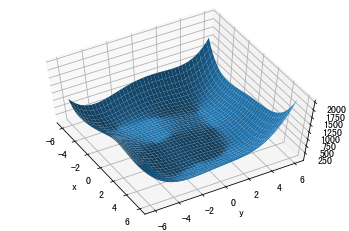

In [2]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  torch



def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [14]:
x = torch.tensor([-1.0,0.0],requires_grad=True)
optimizer = torch.optim.Adam([x],lr=5e-4)
for step in range(30000):
    optimizer.zero_grad()
    pred = himmelblau(x)
    pred.backward()
    optimizer.step()
    
    if step%2000 == 0:
        print('step: {} x = {} f(x)= {}'.format(step,x.tolist(),pred.item()))

step: 0 x = [-1.000499963760376, 0.0004999999655410647] f(x)= 164.0
step: 2000 x = [-2.0577282905578613, 1.1667312383651733] f(x)= 90.62757110595703
step: 4000 x = [-2.718446731567383, 2.2497518062591553] f(x)= 23.560373306274414
step: 6000 x = [-2.8020339012145996, 2.960942506790161] f(x)= 1.1088749170303345
step: 8000 x = [-2.805062770843506, 3.1294891834259033] f(x)= 0.00013457478780765086
step: 10000 x = [-2.805114507675171, 3.131300210952759] f(x)= 6.4437699620611966e-09
step: 12000 x = [-2.805116891860962, 3.131308078765869] f(x)= 8.440110832452774e-10
step: 14000 x = [-2.8051178455352783, 3.1313109397888184] f(x)= 9.913492249324918e-11
step: 16000 x = [-2.8051180839538574, 3.131312131881714] f(x)= 5.6843418860808015e-12
step: 18000 x = [-2.8051180839538574, 3.131312370300293] f(x)= 2.2737367544323206e-13
step: 20000 x = [-2.8051180839538574, 3.131312370300293] f(x)= 2.2737367544323206e-13
step: 22000 x = [-2.8051180839538574, 3.131312608718872] f(x)= 2.2737367544323206e-13
step: